# EasyOCR

## About 

[EasyOCR](https://github.com/JaidedAI/EasyOCR) is an Optical Character Recognition library for python. It is It has been trained on [80+ languages](https://www.jaided.ai/easyocr/). It can even read multiple languages in one image (given that they are compatible). 

It gives the output as text box coordinates, text, and model confidence level. 

[Tutorial](https://www.jaided.ai/easyocr/tutorial/)

Out of the box the program has many implementations. 

*   useful tool for webscraping if you would also like to pull text from the images
*   Can be great for creating accessibility tools for social media sites where often users do not put alternative text on images that contain text 
*   translating images with texts from other languages that you do not know 

Although it is a powerful tool there are things to be mindful of. 

1. The reader can take in either a local file or a URL. But sometimes this can be tricky if you have too many requests or are forbidden access. 
2. If you are using this for webscraping of online content be careful to look at Terms of Service or Copyright of the content that you are looking at if it is not just for private use. 
3. It is also not perfect as there are errors in some of the examples below.

They have recently implemented a way to [train your own model](https://github.com/JaidedAI/EasyOCR/blob/master/custom_model.md) if you are having issues with it reading certain fonts or images. The training pipeline uses a modified version of the [deep-text-recognition-benchmark](https://github.com/clovaai/deep-text-recognition-benchmark) framework. 

They are also planning to introduce handwriting recognition. 

Although it is relatively easy to use with some programming experience JadedAI also offers a paid version where you can just import images and choose the language. 




## Demo 

### Setup 

In [ ]:
!pip install easyocr --quiet

In [ ]:
# fixing package mismatch issue
!pip uninstall opencv-python-headless==4.5.5.62 --yes --quiet
!pip install opencv-python-headless==4.1.2.30 --quiet

In [ ]:
#import library and make different language readers
import easyocr
import matplotlib.pyplot as plt
import cv2
import urllib.request

#more set up so that I do not get HHTP Error 403: Forbidden
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

#English Reader
en_reader = easyocr.Reader(['en'])
#Spanish Reader
es_reader = easyocr.Reader(['es'])
#Korean Reader
ko_reader = easyocr.Reader(['ko'])
#Japanese & English 
ja_en_reader = easyocr.Reader(['ja', 'en'])

In [ ]:
#making reusable reader so i dont have to write the code multiple times 

def show_boxes (url, my_reader): 
  urllib.request.urlretrieve( url , "sample.jpg")
  image = cv2.imread('sample.jpg')
  res = my_reader.readtext('sample.jpg') 
  print (f"{'Text':<60}{'Confidence Level':<15}")
  print('-' * 80)
  for (bbox, text, prob) in res: 
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    print(f"{text:<60}{prob:<15}")
  plt.rcParams['figure.figsize'] = (16,16)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### English Reader 

Text                                                        Confidence Level
--------------------------------------------------------------------------------
MLA In-text Citations for Author(s) Reference Guide         0.8479275770321046
No Author                                                   0.9916438367575189
One Author                                                  0.8198912209519066
One Author,                                                 0.8669090881169255
Two Authors,                                                0.9454054444983093
2 sources                                                   0.9657259469531845
source                                                      0.9993799880268214
In-text                                                     0.9999707579492334
(Lopez Pet Care                                             0.8001606589851082
(Pet Care 12)                                               0.5142821521395148
(Lopez 12)                                          

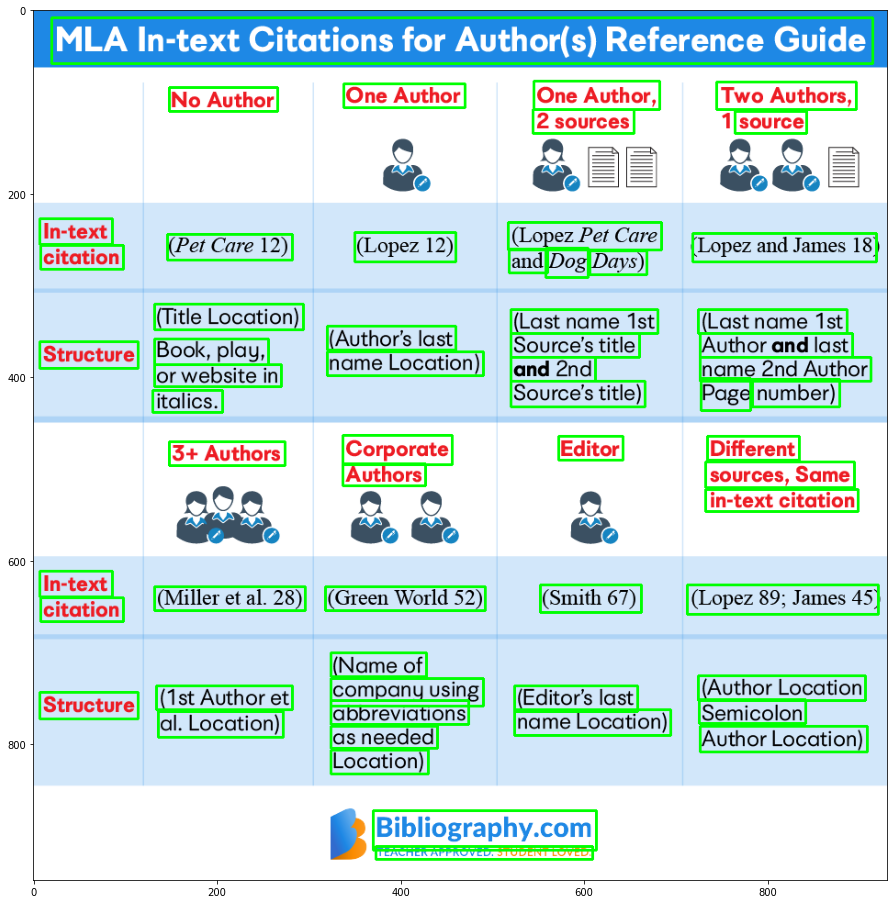

In [ ]:
show_boxes('https://cms.bibliography.com/wp-content/uploads/2019/05/MLA-In-Text-Citations-Authors-Chart.png', en_reader)

Text                                                        Confidence Level
--------------------------------------------------------------------------------
Safely ENDANCEREd                                           0.5667605716092988
Wvbbtoon                                                    0.18963416770758124
What ARE YOU                                                0.5740988503480545
STARGAZING                                                  0.9973018492571684
DOing?                                                      0.6179828763312456
FOUND                                                       0.9989320396952546
ONE!                                                        0.6382976174354553


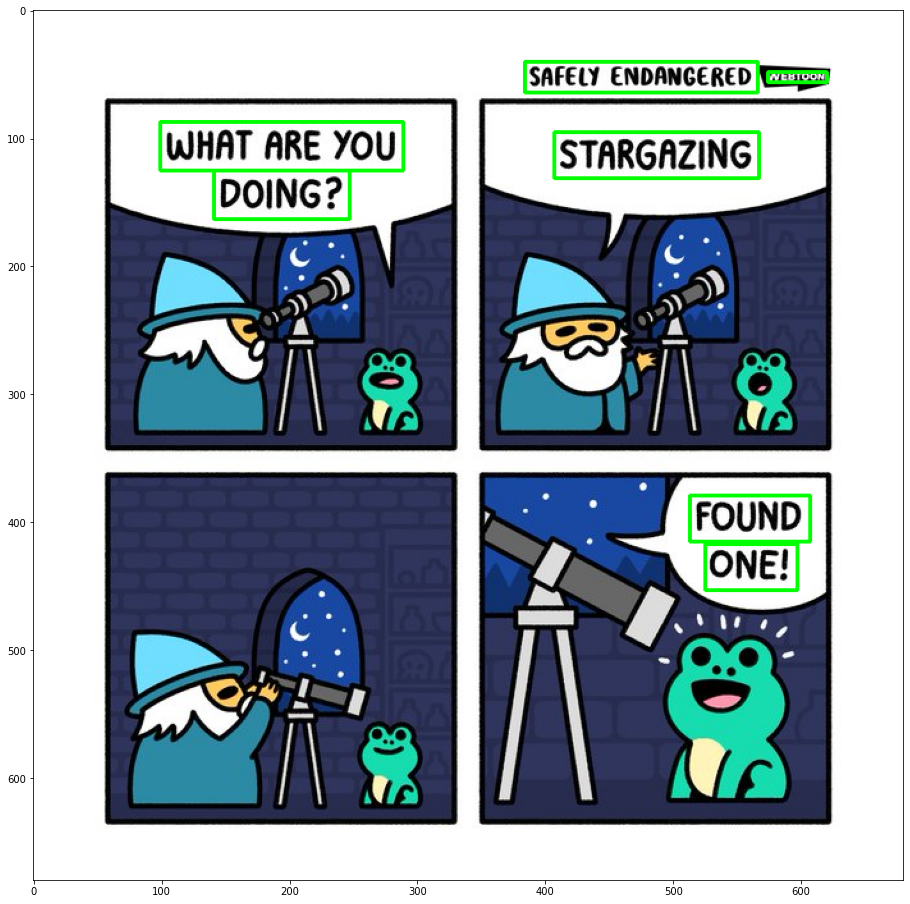

In [ ]:
show_boxes('https://pbs.twimg.com/media/FKrXzkZXwAEBA-r?format=jpg&name=small', en_reader)

### Spanish Reader

Text                                                        Confidence Level
--------------------------------------------------------------------------------
Primero que nada;                                           0.82928192145006
buenos días                                                 0.7025447097191088


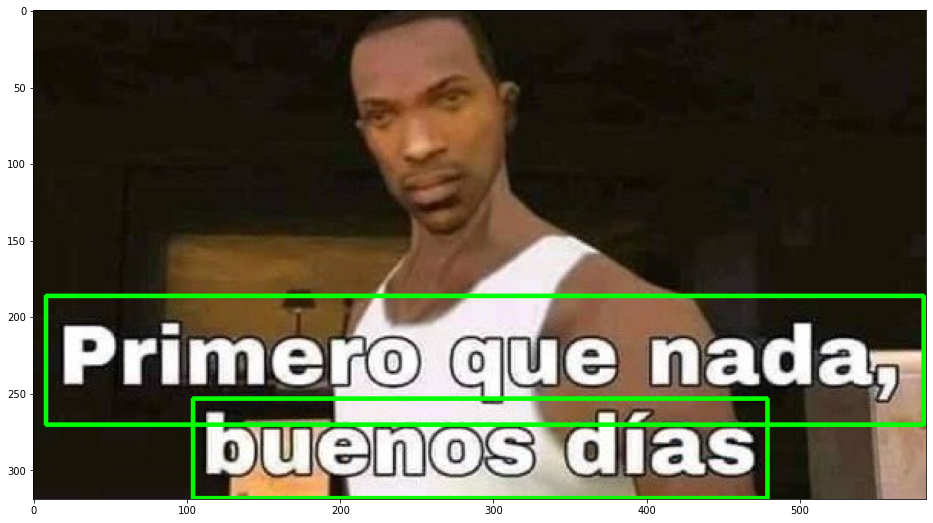

In [ ]:
show_boxes('https://cdn.discordapp.com/attachments/786483895343644692/938863321896075264/Buenos_Dias.jpg', es_reader)

Text                                                        Confidence Level
--------------------------------------------------------------------------------
los vatos prehispánicos cuando                              0.9109938945355579
su morrita se convierte en cerro                            0.823219619573294
Agustín                                                     0.9776975770192503
EV                                                          0.833978928505391
no                                                          0.9999822983695145
puede ser                                                   0.9999909400734736


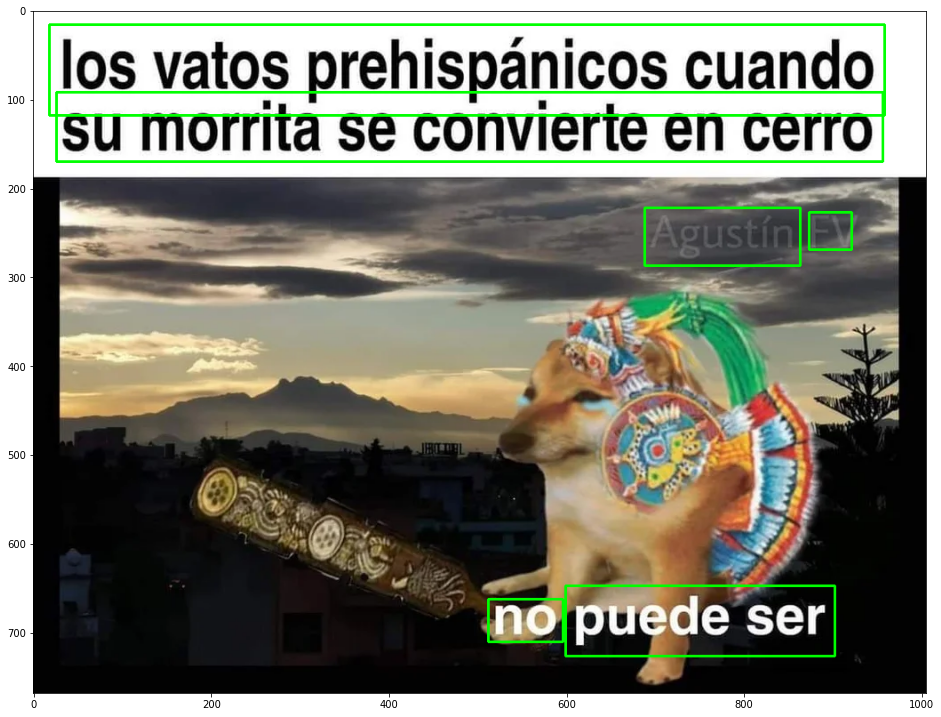

In [ ]:
show_boxes('https://cdn.discordapp.com/attachments/786483895343644692/938863665522802688/wo5mi5h57z261.png', es_reader)

### Korean Reader

Text                                                        Confidence Level
--------------------------------------------------------------------------------
물병자리                                                        0.9372132420539856
[1/리 ~ [리/18                                                0.25988811100487097
물고기자리                                                       0.9992939595597214
[2/19 ~ [3리                                                 0.494083087703262
주위에서 맵돌고 있년 깨물미 당신                                          0.18761910983473232
하루의 처음과 끝쎄서 깊습이 반전                                          0.24147209098514938
메게 쓸리 들어모는 날미 덜 것미                                          0.14319195722634412
되는 문수입니다 종일 불만하고                                            0.9072936793779608
망자리                                                         0.4755830736929668
[3/21                                                       0.632104812624853
[4/19                                             

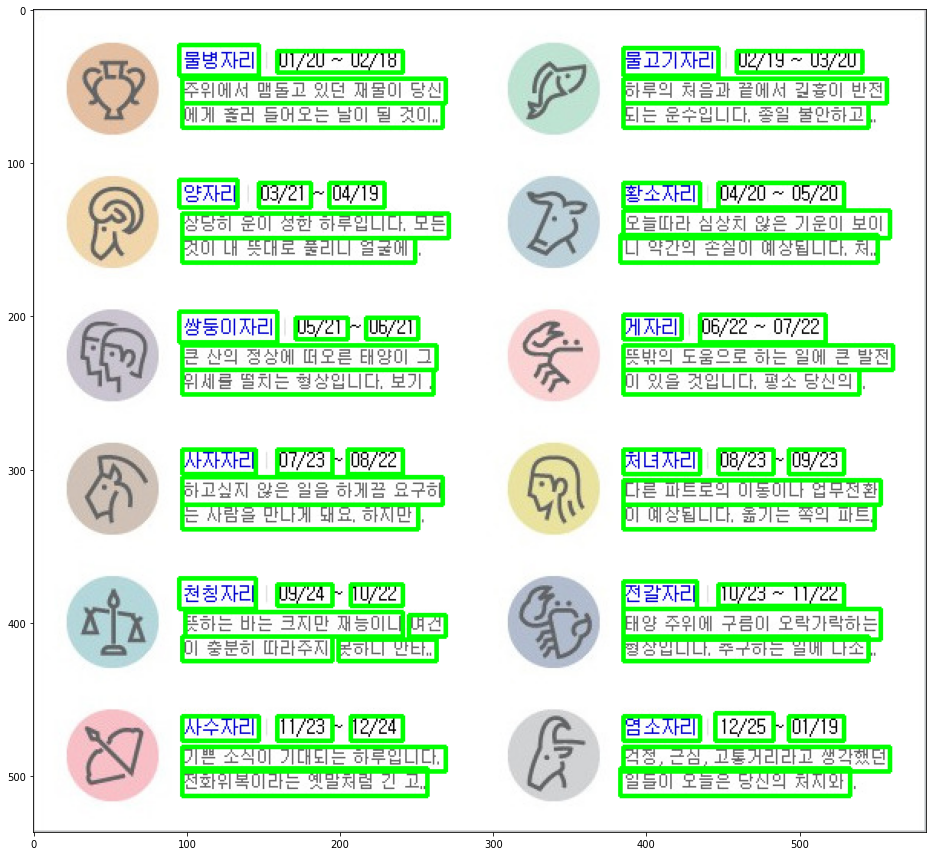

In [ ]:
show_boxes('https://t1.daumcdn.net/cfile/tistory/99CE9C505F23DFD221', ko_reader)

Text                                                        Confidence Level
--------------------------------------------------------------------------------
고속도로   첫  운전으로 도착한   곳은                                     0.47449691428482155
외고모할머니                                                      0.998681075062508
댁이없다                                                        0.9608414173126221
고모~                                                         0.8668539524078369
아이고                                                         0.9999940121825609
아도   같이   앞네                                                0.5362756782692704
막 운전 배우기 시작한 아 (29)                                         0.8380754668292646
외고모할머니께서   직접 농사지으신                                         0.6810660654097647
배추름 얻어 가기 위해서엿다                                             0.4994996820956724


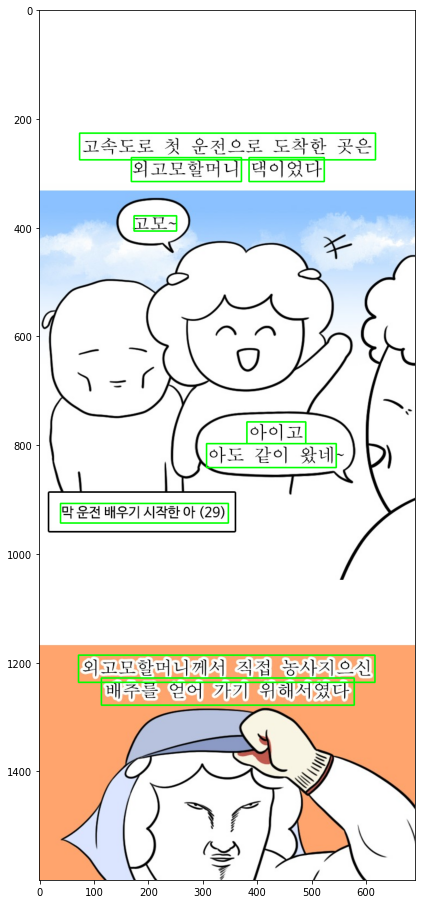

In [ ]:
show_boxes('https://image-comic.pstatic.net/webtoon/748105/131/20211124111925_fa0d5663494d9ce21c0150859afffe18_IMAG01_1.jpg', ko_reader)

### Japanese and English Reader

Text                                                        Confidence Level
--------------------------------------------------------------------------------
8.06                                                        0.9946931600570679
BoHRK                                                       0.15307468475159997
Capybara eatcorn ASMR                                       0.868288861527958
長崎バイオパーク公式                                                  0.7274045367118889
19K views                                                   0.7216355105931622
2o hoursago                                                 0.34863173142861165


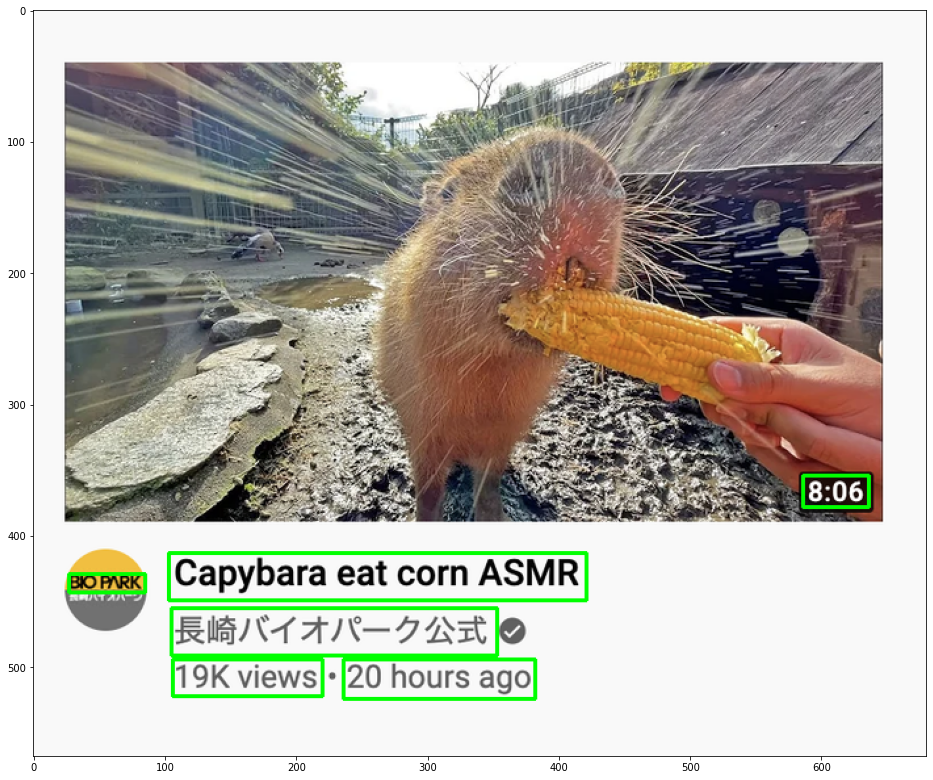

In [ ]:
show_boxes('https://cdn.discordapp.com/attachments/83296014659751936/938550056833933353/FKkUa8DXMAMhKLU.png', ja_en_reader)

Text                                                        Confidence Level
--------------------------------------------------------------------------------
KNGOMB                                                      0.40140872600136396
KNSOMB                                                      0.19989713703124917
加‥マトコス                                                      0.04153810539398858
IOO%TOMATOJUICE                                             0.6018643824856358
Richin                                                      0.9814650274974973
wycopene                                                    0.5272694616414348
GABA                                                        0.5190080404281616
リュピン番茄紅素                                                    0.893334856279732
No:lJapanese1oo%                                            0.4152502187138504
LYCの'z心}                                                    0.0027317108423866466
tomato juice                                   

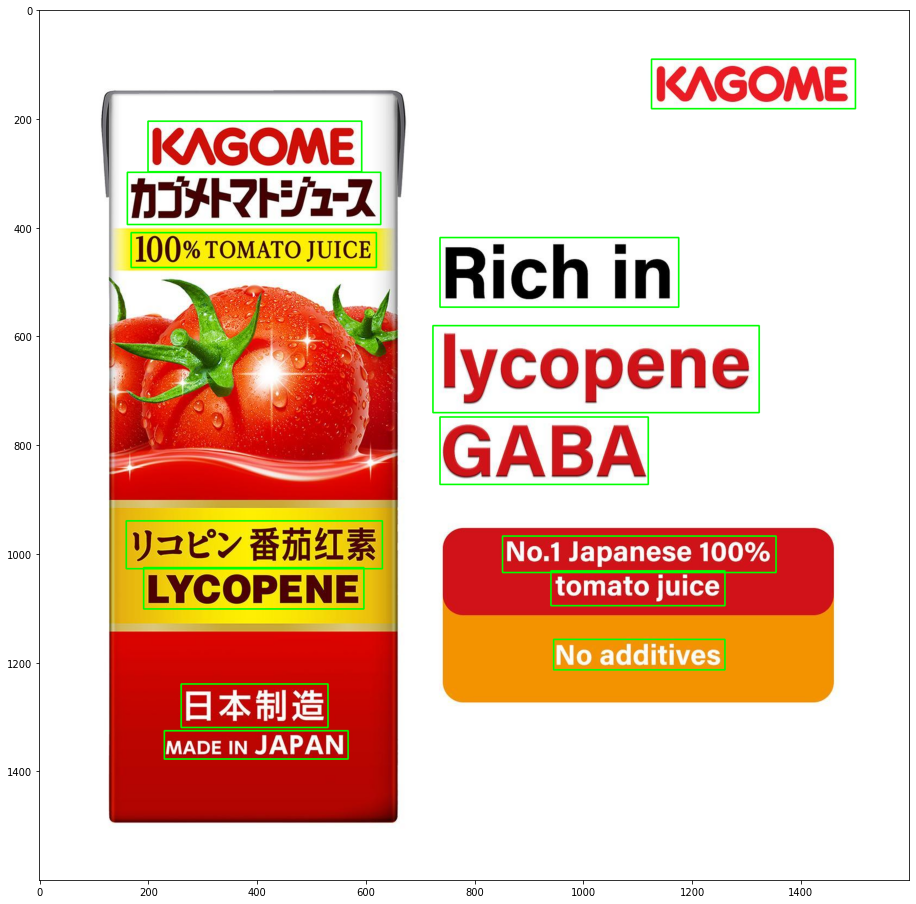

In [ ]:
show_boxes('https://sg-live.slatic.net/p/78187b9bf8ec6d848ec6019f25e83143.jpg', ja_en_reader)